# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python
print("All Packages installed")

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.
All Packages installed


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("The default brain name has been stored")

The default brain name has been stored


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(1,6):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents) 
    
    # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)
        # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations 
        
        # get next state (for each agent)
        rewards = env_info.rewards 
        # get reward (for each agent)
        dones = env_info.local_done     
        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in= layer.weight.data.size()[0]
    lim= 1./np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    def __init__(self,state_size,action_size,seed,fc1_units=480,fc2_units=240):
        
        super(Actor,self).__init__()
        self.seed=torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size,fc1_units)
        self.fc2 = nn.Linear(fc1_units,fc2_units)
        self.fc3 = nn.Linear(fc2_units,action_size)
        self.reset_parameters()
    
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3,3e-3)
    
    def forward(self,state):
        x=F.relu(self.fc1(state))
        x=F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))
    
class Critic(nn.Module):
    
    def __init__(self, state_size,action_size,seed, fc1_units=480,fc2_units = 240):
        super(Critic,self).__init__()
        self.seed= torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size,fc1_units)
        self.fc2 = nn.Linear(fc1_units+action_size,fc2_units)
        self.fc3 = nn.Linear(fc2_units,1)
        self.reset_parameters()
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3,3e-3)
    def forward(self,state,action):
        
        xs= F.relu(self.fc1(state))
        x = torch.cat((xs,action,),dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)
print("Actor and Critic Network Classes are defined")

Actor and Critic Network Classes are defined


In [7]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

from matplotlib import pyplot as plt

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)
BATCH_SIZE= 512
GAMMA=1.0        #No discounting
TAU = 1e-3
LR_ACTOR = 1e-3
LR_CRITIC = 1e-3
WEIGHT_DECAY = 0
UPDATE_EVERY = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#ReplayShared = ReplayBuffer(action_size,BUFFER_SIZE,BATCH_SIZE,random_seed)

class DDPGAgent():
    
    def __init__(self,state_size,action_size,random_seed, ActorLocalNetwork, ActorTargetNetwork,ReplayShared):
        self.state_size =state_size
        self.action_size=action_size
        self.seed=random.seed(random_seed)
        
        #Actor Network
        self.actor_local = ActorLocalNetwork.to(device)
        self.actor_target = ActorTargetNetwork.to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr = LR_ACTOR)
        
        #Critic Network
        
        self.critic_local = Critic(state_size,action_size,random_seed).to(device)
        self.critic_target=Critic(state_size,action_size,random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC,weight_decay=WEIGHT_DECAY)
        
        self.noise= OUNoise(action_size,random_seed)
        
        self.memory= ReplayShared
        self.t_step = 0
        
    def step(self,state,action,reward,next_state,done):
        self.memory.add(state,action,reward,next_state,done)
        self.t_step = (self.t_step+1)%UPDATE_EVERY
        if self.t_step ==0:
            if len(self.memory) > BATCH_SIZE:
                experiences=self.memory.sample()
                self.learn(experiences, GAMMA)
    def act(self,state,add_noise):
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action+=self.noise.sample()
        return action
    
    def reset(self):
        self.noise.reset()
    
    def learn(self,experiences,gamma):
        states,actions,rewards, next_states,dones = experiences
        
        #Update Critic
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states,actions_next)
        Q_targets = rewards+(gamma*Q_targets_next*(1-dones))
        Q_expected = self.critic_local(states,actions)
        critic_loss=F.mse_loss(Q_expected,Q_targets)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        
        #Update Actor
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states,actions_pred).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)
        
    def soft_update(self,local_model,target_model,tau):
        for target_param,local_param in zip(target_model.parameters(),local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    #Noise Process
    def __init__(self,size,seed, mu=0., theta=0.15,sigma=0.2):
        self.mu=mu*np.ones(size)
        self.theta=theta
        self.sigma=sigma
        self.seed=random.seed(seed)
        self.size = size
        self.reset()
    def reset(self):
        self.state=copy.copy(self.mu)
    def sample(self):
        x=self.state
        dx=self.theta*(self.mu-x)+self.sigma*np.random.standard_normal(self.size)
        self.state =x+dx
        return self.state

class ReplayBuffer:
    #Memory Buffer
    def __init__(self,action_size,buffer_size,batch_size,seed):
        self.action_size=action_size
        self.memory=deque(maxlen=buffer_size)
        self.batch_size=batch_size
        self.experience=namedtuple("Experience", field_names=["state","action","reward","next_state","done"])
        self.seed = random.seed(seed)
    def add(self, state, action, reward,next_state, done):
        e=self.experience(state,action,reward,next_state,done)
        self.memory.append(e)
    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float(). to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states,actions,rewards,next_states,dones)
    def __len__(self):
        return len(self.memory)
    
    
    
        
            
        
print("The DDPG Agent, memory buffer, and noise process have been defined")

The DDPG Agent, memory buffer, and noise process have been defined



Episode 100	Agent 1	Score: -0.009999999776482582
Episode 100	Agent 2	Score: 0.0
Episode100	Agent 1 and 2	Max Score: 0.0020000000298023225
Episode 200	Agent 1	Score: 0.0
Episode 200	Agent 2	Score: -0.009999999776482582
Episode200	Agent 1 and 2	Max Score: 0.0010000000149011613
Episode 300	Agent 1	Score: -0.009999999776482582
Episode 300	Agent 2	Score: 0.0
Episode300	Agent 1 and 2	Max Score: 0.0
Episode 400	Agent 1	Score: 0.0
Episode 400	Agent 2	Score: -0.009999999776482582
Episode400	Agent 1 and 2	Max Score: 0.0
Episode 500	Agent 1	Score: 0.0
Episode 500	Agent 2	Score: -0.009999999776482582
Episode500	Agent 1 and 2	Max Score: 0.0
Episode 600	Agent 1	Score: -0.009999999776482582
Episode 600	Agent 2	Score: 0.0
Episode600	Agent 1 and 2	Max Score: 0.0
Episode 700	Agent 1	Score: -0.009999999776482582
Episode 700	Agent 2	Score: 0.0
Episode700	Agent 1 and 2	Max Score: 0.005000000074505806
Episode 800	Agent 1	Score: 0.0
Episode 800	Agent 2	Score: -0.009999999776482582
Episode800	Agent 1 and 2	M

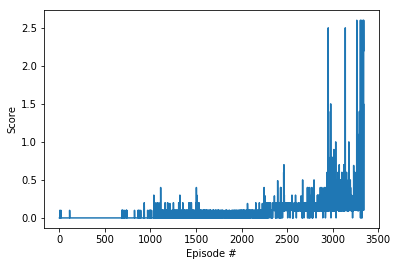

In [8]:
#Create Agents
random_seed = 2
state_size=24
action_size=2

ReplayShared = ReplayBuffer(action_size,BUFFER_SIZE,BATCH_SIZE,random_seed)
ActorLocalNetwork = Actor(state_size, action_size, random_seed)
ActorTargetNetwork = Actor(state_size, action_size, random_seed)


Agent1 = DDPGAgent(state_size,action_size, random_seed, ActorLocalNetwork, ActorTargetNetwork, ReplayShared)
Agent2 = DDPGAgent(state_size,action_size, random_seed, ActorLocalNetwork, ActorTargetNetwork, ReplayShared)









def ddpg(n_episodes=3500, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scoreList = []
    addNoiseValue = True
    
    for i_episode in range(1,n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        #print("The shape of states is", states.shape)
        Agent1.reset()
        Agent2.reset()
        scores = np.zeros(num_agents)
        for t in range(max_t):
            #if i_episode < 1000:
            action1 = Agent1.act(states[0],addNoiseValue)
            action2 = Agent2.act(states[1],addNoiseValue)
            #else:
            #    action = Agent1.act(states[0],False)
            #    action = Agent2.act(states[1],False)
            #print("The shape of action1 is is", action1.shape)
            #print("The shape of action2 is", action2.shape)
            
            action = [action1,action2]
            env_info= env.step(action)[brain_name]
            next_states=env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            Agent1.step(states[0], action1, rewards[0], next_states[0], dones[0])
            Agent2.step(states[1], action2, rewards[1], next_states[1], dones[1])
            scores += rewards
            states=next_states
            
            
            if np.any(dones):
                break
        scores_deque.append(np.max(scores))
        scoreList.append(np.max(scores))

    
        if i_episode % print_every == 0:
            print('\nEpisode {}\tAgent 1\tScore: {}'.format(i_episode,scores[0]), end="")
            print('\nEpisode {}\tAgent 2\tScore: {}'.format(i_episode,scores[1]), end="")
            print('\nEpisode{}\tAgent 1 and 2\tMax Score: {}'.format(i_episode,np.mean(scores_deque)), end="") 
            
            if np.mean(scores_deque)>= 0.1:
                addNoiseValue=False
            #print('\rEpisode {}\tAgent 1 and 2\tAverage Score: {}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {}'.format(i_episode-100,np.mean(scores_deque)))
            torch.save(Agent1.actor_local.state_dict(), 'Tennis_Model_checkpoint_actor_local.pth')
            torch.save(Agent1.actor_target.state_dict(),'Tennis_Model_checkpoint_actor_target.pth')
            torch.save(Agent1.critic_local.state_dict(), 'Tennis_Model_Agent1checkpoint_critic_local.pth')
            torch.save(Agent1.critic_target.state_dict(), 'Tennis_Model_Agent1checkpoint_critic_target.pth')
            torch.save(Agent2.critic_local.state_dict(), 'Tennis_Model_Agent2checkpoint_critic_local.pth')
            torch.save(Agent2.critic_target.state_dict(), 'Tennis_Model_Agent2checkpoint_critic_target.pth')
            
            
            
            break
            
            #torch.save(Agent1.actor_local.state_dict(), 'checkpoint_actor.pth')
            #torch.save(Agent1.critic_local.state_dict(), 'checkpoint_critic.pth')
            #torch.save(Agent1.actor_local.state_dict(), 'checkpoint_actor.pth')
            #torch.save(Agent1.critic_local.state_dict(), 'checkpoint_critic.pth')
    return scoreList

scoreList = ddpg()



fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scoreList)+1), scoreList)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
            
            
                        
            